Algorithm set to binary classification.
Models in pipeline: ['LogReg', 'KNN', 'RF', 'AdaBoost', 'XGBoost', 'SVM', 'MLP']

Data stats ==================>
Number of features: 30
Total number of instances: 569
Size of the training set: 426
Size of the validation set: 143

Parallel processing with 2 cores.


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:56<00:00, 12.48s/it]




Final stats ================>>
Target metric: F1
------------------------------------
Logistic Regression       --> Mean: 0.985   Std: 0.011
K-Nearest Neighbors       --> Mean: 0.945   Std: 0.023
Random Forest             --> Mean: 0.965   Std: 0.020
Adaptive Boosting         --> Mean: 0.986   Std: 0.011
Extreme Gradient Boosting --> Mean: 0.964   Std: 0.024
Support Vector Machine    --> Mean: 0.978   Std: 0.019
Multilayer Perceptron     --> Mean: 0.978   Std: 0.014


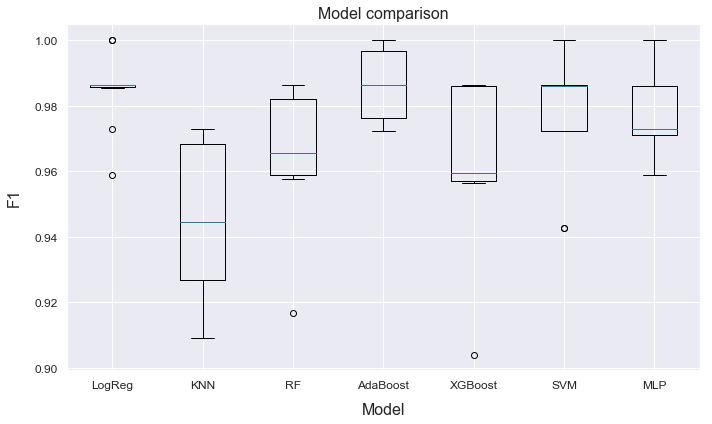

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_wine, load_breast_cancer
from automl import AutoML

# Create the data as pandas dataframes
x = load_breast_cancer()
data = np.c_[x.data, x.target]
columns = np.append(x.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
Y = data['target']

# Create the data as numpy arrays
#X, Y = load_breast_cancer(return_X_y=True)

# Run AutoML pipeline
models = AutoML(X, Y,
                models=['LogReg', 'KNN', 'RF', 'AdaBoost', 'XGBoost', 'SVM', 'MLP'],
                metric="f1",
                percentage=100,
                ratio=0.25,
                max_iter=25,
                batch_size=1,
                cv=True,
                n_splits=10,
                n_jobs=2,
                save_plot=None,
                verbose=1)


In [2]:
models['MLP'].best_params

{'hidden_layer_sizes': (11, 57, 45),
 'alpha': 0.1,
 'learning_rate_init': 0.001,
 'max_iter': 385,
 'batch_size': 32}

In [9]:
models['SVM'].best_model

LinearSVC(C=4.7, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=9985,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [10]:
models['LogReg'].Precision()

0.9775280898876404

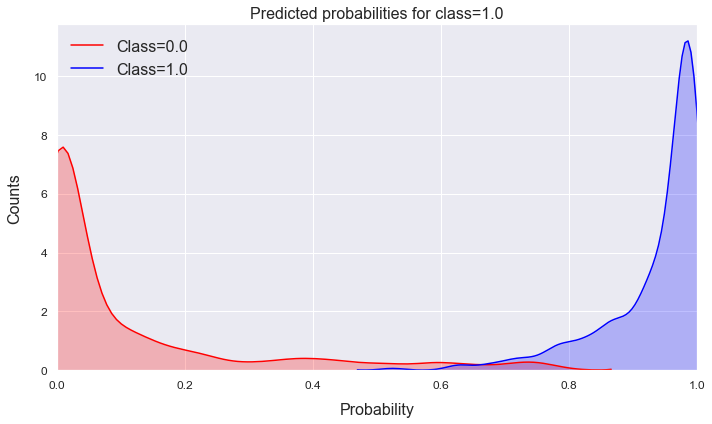

In [11]:
models['SVM'].plot_proba()

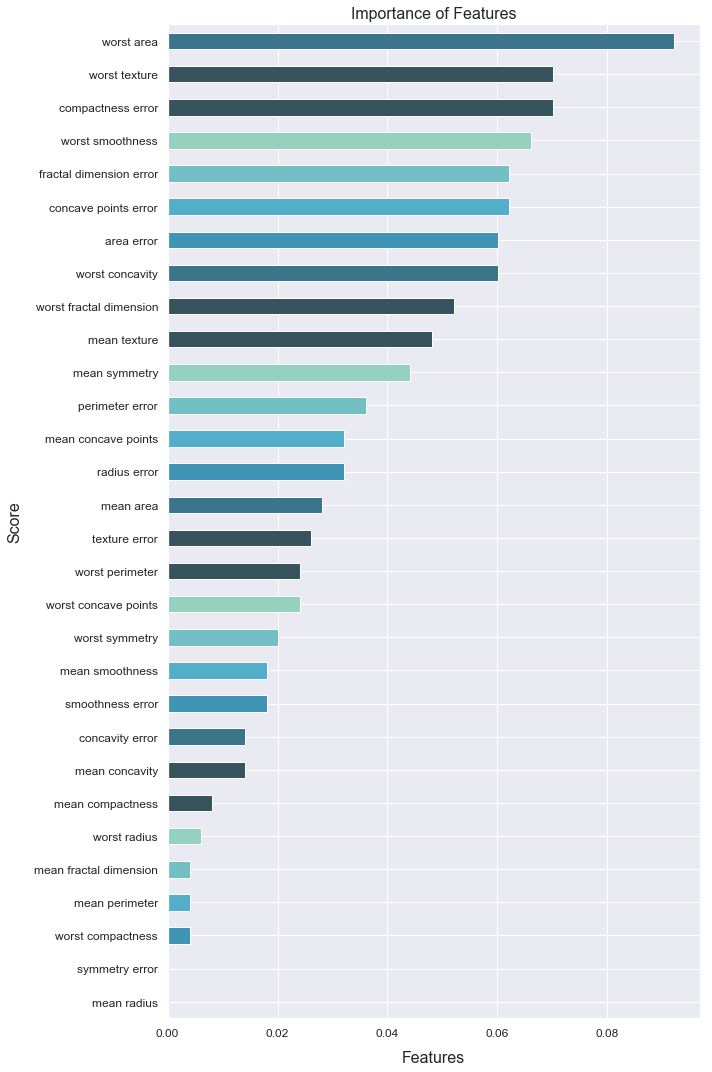

In [12]:
models['AdaBoost'].plot_feature_importance()

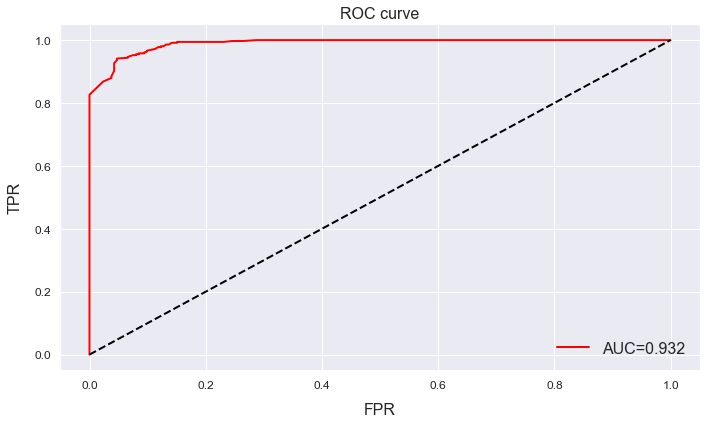

In [13]:
models['KNN'].plot_ROC()

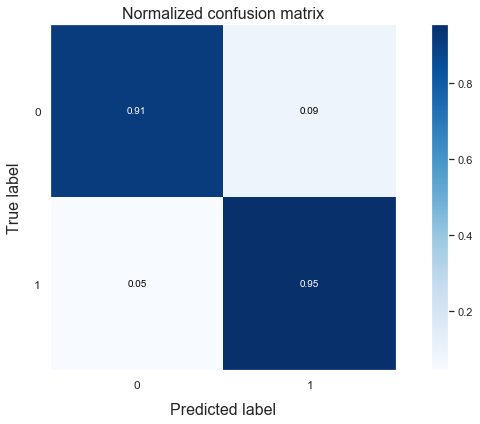

In [14]:
models['KNN'].plot_confusion_matrix()

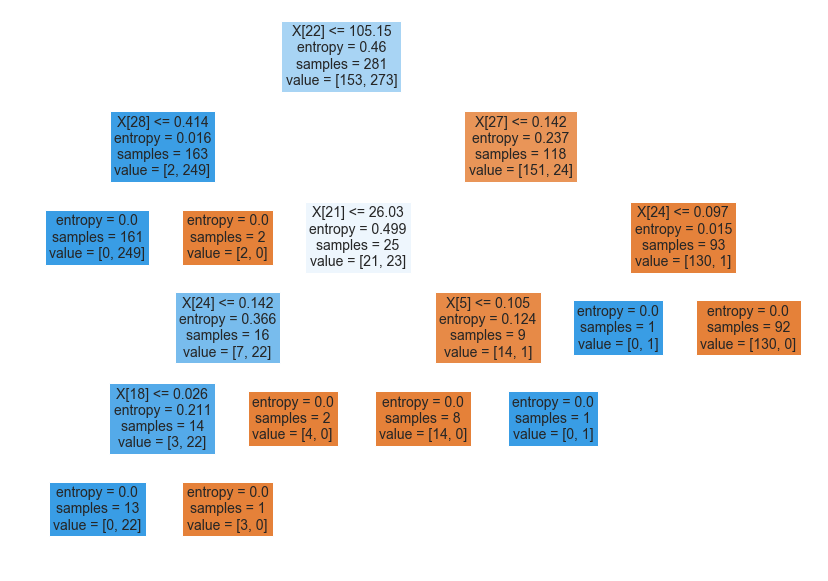

In [16]:
models['RF'].plot_decision_tree(10, rotate=False)